In [1]:
from HeaderP import *

In [2]:
import Astraea

In [3]:
def readsimdata(simNo,z,Rcut,select,Rcut_thread,zcut_thread):
    if simNo=='data':
        data=pd.read_pickle('../SecondYear/CannonDR16_cut.pkl')
        data['z_today']=data['z']
        data['x_today']=data['X']
        data['y_today']=data['Y']
        data['feh_scale']=data['M_H']
        data['ofe_scale']=data['O_FE']
        data['age']=data['Age']
    elif select:
        data=pd.read_pickle('/Users/yl4331/Desktop/SimulationData/Data/Buck_g'+simNo+'_apogee_selec.pkl')
        data['R_bir']=np.sqrt((data['x_birth'])**2+data['y_birth']**2)
        data['R']=np.sqrt((data['x_today'])**2+data['y_today']**2)
        scale_fe=0.250019907951355/0.35828184923028494
        scale_o=0.10861970484256744/0.09543676896214373
        data['feh_scale']=data['feh']*scale_fe-0.0906638577580452+0.08980628554112494
        data['ofe_scale']=data['ofe']*scale_o+0.08182460814714432-0.17121922547292423
        data['dR']=data['R']-data['R_bir']
        data['dz']=abs(data['z_today'])-abs(data['z_birth'])
    
    elif not select:
        if z=='0':
            data=pd.read_pickle('/Users/yl4331/Desktop/SimulationData/Data/Buck_g'+simNo+'.pkl')
        else:
            data=pd.read_pickle('/Users/yl4331/Desktop/SimulationData/Data/Buck_g'+simNo+'_z'+z+'.pkl')
            try:
                data['x_today']=data['x']
                data['y_today']=data['y']
                data['z_today']=data['z']
            except:
                print(np.shape(data['x_today']))

        data['R_bir']=np.sqrt((data['x_birth'])**2+data['y_birth']**2)
        data['R']=np.sqrt((data['x_today'])**2+data['y_today']**2)
        scale_fe=0.250019907951355/0.35828184923028494
        scale_o=0.10861970484256744/0.09543676896214373
        data['feh_scale']=data['feh']*scale_fe-0.0906638577580452+0.08980628554112494
        data['ofe_scale']=data['ofe']*scale_o+0.08182460814714432-0.17121922547292423
        
        if Rcut:
            data=data.loc[data['R_bir']<Rcut_thread].reset_index(drop=True)
            data=data.loc[abs(data['z_birth'])<zcut_thread].reset_index(drop=True)
        data['dR']=data['R']-data['R_bir']
        data['dz']=abs(data['z_today'])-abs(data['z_birth'])
    return data
        

# w/o radial cut

In [5]:
simNo='2_79e12'
z='0'
Rcut=False
select=False
Rcut_thread=30
zcut_thread=5


data=readsimdata(simNo,z,Rcut,select,Rcut_thread,zcut_thread)

In [432]:
data.columns

Index(['vx_birth', 'vy_today', 'vz_today', 'z_today', 'vy_birth', 'ofe',
       'iords', 'vx_today', 'x_today', 'feh', 'x_birth', 'y_birth', 'vz_birth',
       'mass', 'y_today', 'oxh', 'z_birth', 'age', 'iord', 'vx', 'vy', 'vz',
       'x', 'y', 'z', 'Jr', 'Jphi', 'Jz', 'R', 'R_bir', 'feh_scale',
       'ofe_scale', 'dR', 'dz'],
      dtype='object')

In [8]:
regr, regr_outs = Astraea.RFregressor(data, ['feh_scale','age'],
                                      target_var='R_bir', target_var_err='R_bir', n_estimators=3)

Simpliest example:
 regr,regr_outs = RFregressor(df,testF)

Fraction of data used to train: 0.8
# of Features attempt to train: 2
Features attempt to train: ['feh_scale', 'age']
ID column not found, using index as ID!
7950040 stars in dataframe!
7950040 total stars used for RF!
6360032 training stars!
Finished training! Making predictions!
Finished predicting! Calculating statistics!
Median Relative Error is: 0.22606898280466942
Average chi^2 is: 108.47028850745002
Finished!


In [11]:
regr_outs

importance            [0.6093887474338853, 0.39061125256611473]
actrualF                                       [age, feh_scale]
ID_train      [7427466, 6955737, 5685248, 5540057, 694552, 5...
ID_test       [1, 2, 6, 7, 18, 20, 21, 22, 33, 36, 37, 38, 4...
prediction    [18.92637967635329, 18.92637967635329, 67.2574...
ave_chi2                                                 108.47
MRE                                                    0.226069
X_test        [[13.839232566993491, -29.299028432382496], [1...
y_test        [18.145175317150155, 18.698499773305375, 36.14...
X_train       [[1.0318408416575444, 0.3267270830420257], [1....
y_train       [0.45234438050927467, 7.872670160232711, 18.06...
dtype: object

In [ ]:
data_predict=data.iloc[regr_outs['ID_test']]

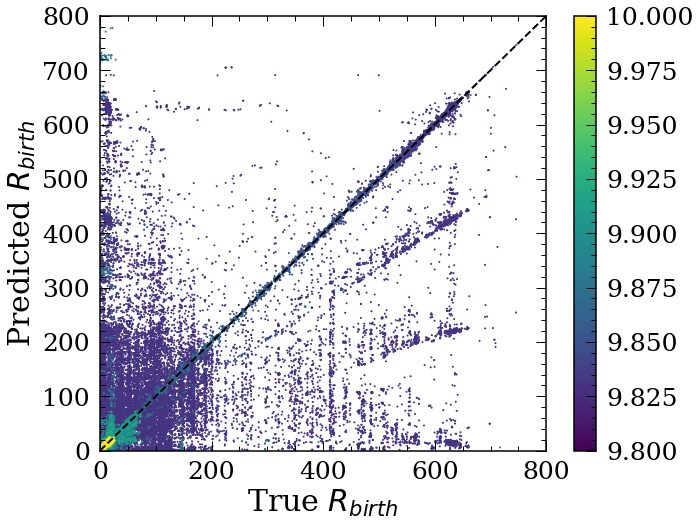

In [24]:
plt.figure(figsize=(10,8))
plt.scatter(regr_outs['y_test'], regr_outs['prediction'], c=np.log(data_predict['mass']),s=1,vmin=9.8,vmax=10)
plt.plot([0,800],[0,800],'k--')
plt.xlabel('True $R_{birth}$')
plt.ylabel('Predicted $R_{birth}$')
plt.xlim([0,800])
plt.ylim([0,800])
cbar = plt.colorbar()
#cbar.set_label('Mass',labelpad = 5)

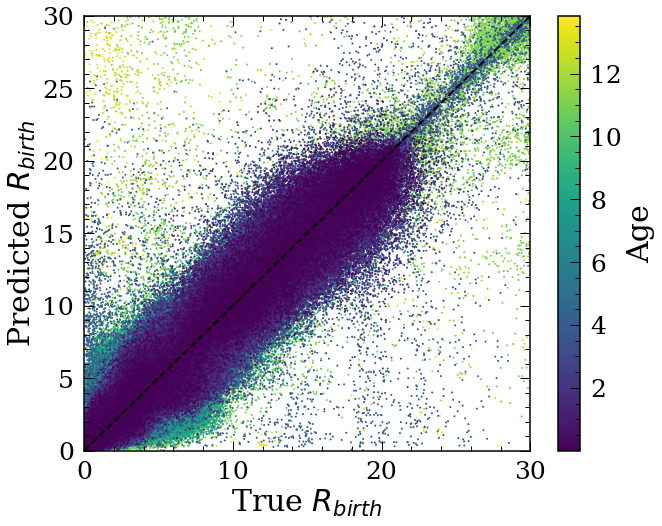

In [31]:
plt.figure(figsize=(10,8))
plt.scatter(regr_outs['y_test'], regr_outs['prediction'], c=data_predict['age'],s=1)
plt.plot([0,30],[0,30],'k--')
plt.xlabel('True $R_{birth}$')
plt.ylabel('Predicted $R_{birth}$')
plt.xlim([0,30])
plt.ylim([0,30])
cbar = plt.colorbar()
cbar.set_label('Age',labelpad = 5)

# w/ radial cut

In [440]:
simNo='2_79e12'
z='0'
Rcut=True
select=False
Rcut_thread=30
zcut_thread=5


data=readsimdata(simNo,z,Rcut,select,Rcut_thread,zcut_thread)

In [33]:
regr, regr_outs = Astraea.RFregressor(data, ['feh_scale','age'],
                                      target_var='R_bir', target_var_err='R_bir', n_estimators=3)

Simpliest example:
 regr,regr_outs = RFregressor(df,testF)

Fraction of data used to train: 0.8
# of Features attempt to train: 2
Features attempt to train: ['feh_scale', 'age']
ID column not found, using index as ID!
7528957 stars in dataframe!
7528957 total stars used for RF!
6023165 training stars!
Finished training! Making predictions!
Finished predicting! Calculating statistics!
Median Relative Error is: 0.22997420331507182
Average chi^2 is: 0.9005492094839667
Finished!


In [35]:
data_predict=data.iloc[regr_outs['ID_test']]

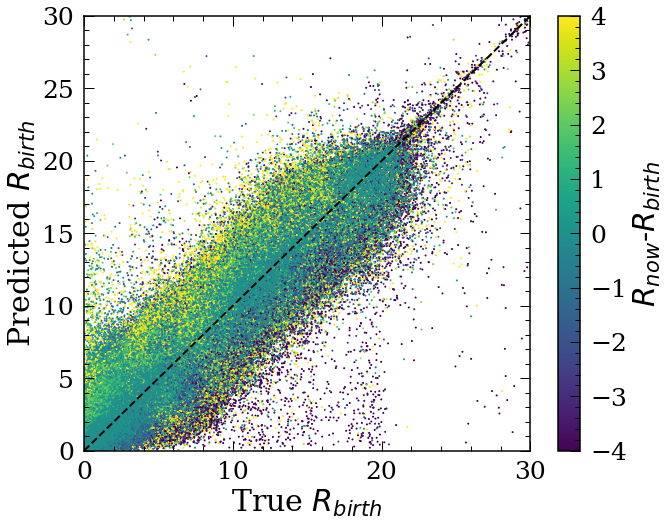

In [42]:
plt.figure(figsize=(10,8))
plt.scatter(regr_outs['y_test'], regr_outs['prediction'], c=(data_predict['R']-data_predict['R_bir']),s=1,
           vmin=-4,vmax=4)
plt.plot([0,30],[0,30],'k--')
plt.xlabel('True $R_{birth}$')
plt.ylabel('Predicted $R_{birth}$')
plt.xlim([0,30])
plt.ylim([0,30])
cbar = plt.colorbar()
cbar.set_label('$R_{now}$-$R_{birth}$',labelpad = 5)

# predict rbirth with Minchev 2018

## Get present day metallicity gradient and gradient with time in the Solar neighborhood

In [520]:
import random

SolarRad=8.2*(5./3.)

def getbin(x,y,binnumb=100):
    xbin=np.linspace(min(x),max(x),binnumb)
    x_bin=((max(x)-min(x))/binnumb)/2+xbin[:-1]
    y_bin=np.zeros(len(x_bin))
    for i in range(len(x_bin)):
        m=(x>xbin[i])&(x<xbin[i+1])
        y_bin[i]=np.median(y[m])
    return x_bin, y_bin
    

def get_SR(feh, x, y, radius=0.2*(5./3.), plotpoints=False):
    # radius: how big the solar circle is...
    
    # generate random location of the sun
    x_sun=random.uniform(-SolarRad, SolarRad)
    y_sun=np.sqrt(SolarRad**2.-x_sun**2.)*np.random.choice([-1,1])
    
    # get stars in the solar circle
    m=(((x-x_sun)**2.+(y-y_sun)**2.)<radius**2.)
    
    feh_sr, x_sr, y_sr = feh[m], x[m], y[m]
    
    r_sr=np.sqrt(x[m]**2. + y[m]**2.)
    
    if plotpoints:
        plt.figure()
        plt.plot(x,y,'k.',markersize=1)
        plt.plot(x_sr, y_sr,'r.',markersize=5)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        
    return feh_sr, r_sr, m


def calc_dfedr_SR(feh, r, plotpoints=False):
    r_bin, feh_bin = getbin(r, feh, binnumb=100)
    p = fitpoints(r_bin,feh_bin)
    if plotpoints:
        plt.figure()
        plt.plot(r_bin,feh_bin,'k.',markersize=5)
        plt.plot([min(r_bin),max(r_bin)],p([min(r_bin),max(r_bin)]),'r-',label='Gradient = %.4f'%(p[1]))
        plt.xlabel('R')
        plt.ylabel('[Fe/H]')
        plt.legend()
    return p[1]

No handles with labels found to put in legend.


-0.07997606902020193


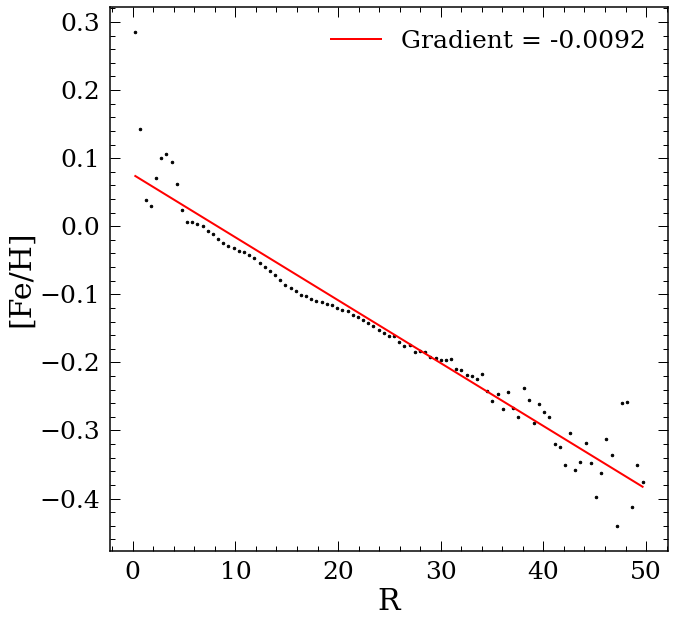

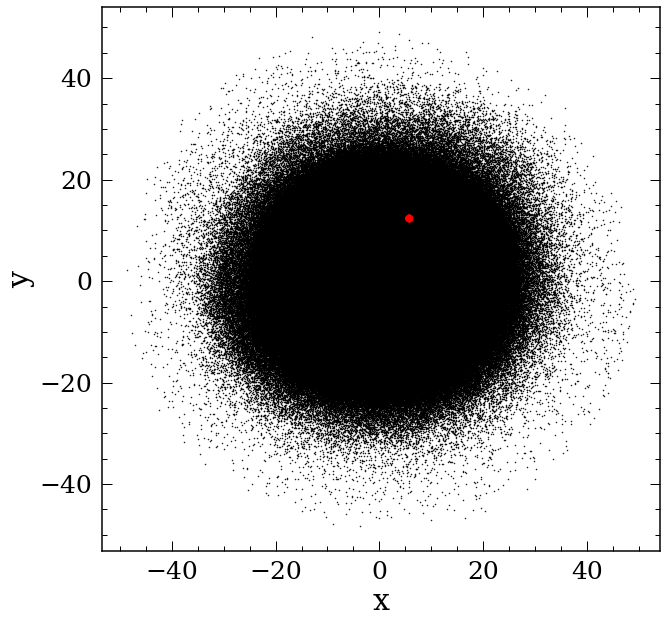

In [495]:
# present day metallicity gradient
p=calc_dfedr_SR(data['feh_scale'].values,data['R'].values,plotpoints=True)

# present day metallicity in the solar neighborhood
feh_sr, r_sr, m_sr = get_SR(data['feh_scale'].values, data['x'].values, data['y'].values,plotpoints=True)

feh_p = np.mean(feh_sr)
print(feh_p)

(0.0, 14.0)

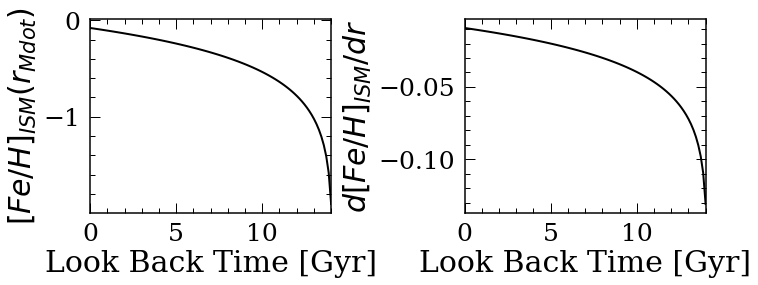

In [496]:
def getfeh_sr(t):
    return math.log(14-t,15)-math.log(14,15)+feh_p

def getfeh_slope(t):
    return (math.log(14-t,15)-math.log(14,15))/15+p

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(np.linspace(0,14,100),np.array([getfeh_sr(i) for i in np.linspace(0,13.9,100)]),'k-')
plt.xlabel('Look Back Time [Gyr]')
plt.ylabel('$[Fe/H]_{ISM}(r_{Mdot})$')
plt.xlim([0,14])

plt.subplot(1,2,2)
plt.plot(np.linspace(0,14,100),np.array([getfeh_slope(i) for i in np.linspace(0,13.9,100)]),'k-')
plt.xlabel('Look Back Time [Gyr]')
plt.ylabel('$d[Fe/H]_{ISM}/dr$')
plt.tight_layout()
plt.xlim([0,14])

In [497]:
SolarRad=8.2*(5./3.)
def feh_lookback(t):
    m=getfeh_slope(t)
    y=getfeh_sr(t)
    b=y-m*SolarRad
    return m, b


Text(0, 0.5, 'frequency')

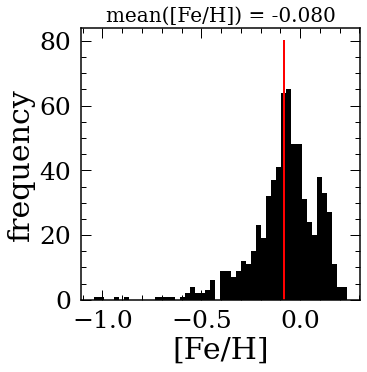

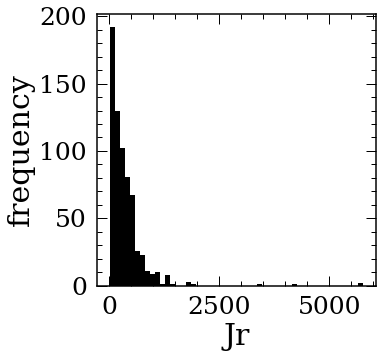

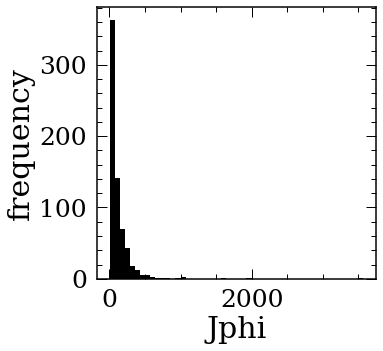

In [498]:
# metallicity at the solar neighborhood
plt.figure(figsize=(5,5))
plt.hist(feh_sr,bins=50,color='k');
plt.plot([np.mean(feh_sr), np.mean(feh_sr)],[0,80],'r-')
plt.title('mean([Fe/H]) = %.3f'%np.mean(feh_sr),fontsize=20)
plt.xlabel('[Fe/H]')
plt.ylabel('frequency')

plt.figure(figsize=(5,5))
plt.hist(data['Jr'][m_sr],bins=50,color='k');
plt.xlabel('Jr')
plt.ylabel('frequency')

plt.figure(figsize=(5,5))
plt.hist(data['Jphi'][m_sr],bins=50,color='k');
plt.xlabel('Jphi')
plt.ylabel('frequency')

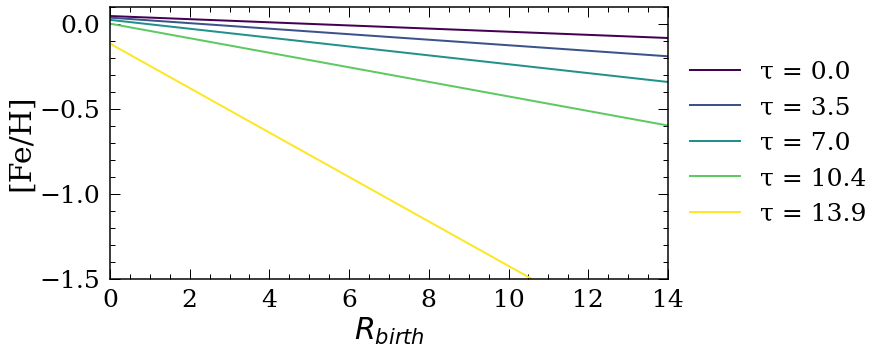

In [499]:
def getcolor(vrange,cm=plt.cm.get_cmap('viridis')):
    cmap = cm
    norm = matplotlib.colors.Normalize(vmin=min(vrange), vmax=max(vrange))
    return [cmap(norm(i)) for i in vrange]


# plot all the stars in the solar neighborhood
binnumb=10
colors_feh = getcolor(np.linspace(0,13.9,5))



plt.figure(figsize=(10,5))
for count, i in enumerate(np.linspace(0,13.9,5)):
    m, b = feh_lookback(i)
    #print(i, m, b, m*SolarRad+b)
    plt.plot(np.linspace(0,14,10),m*(np.linspace(0,14,10))+b,label='τ = %.1f'%i,c = colors_feh[count])
plt.xlabel('$R_{birth}$')
plt.ylabel('[Fe/H]')
plt.xlim([0,14])
plt.ylim([-1.5,0.1])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

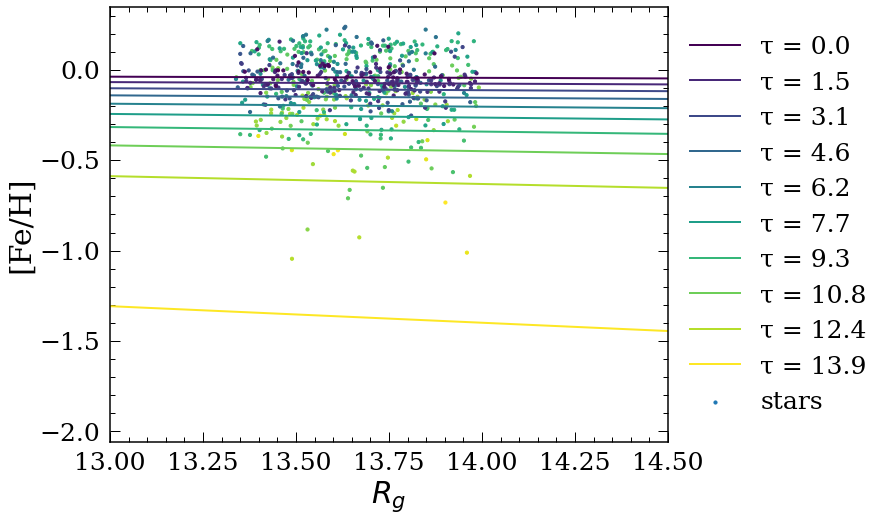

In [500]:
def getcolor(vrange,cm=plt.cm.get_cmap('viridis')):
    cmap = cm
    norm = matplotlib.colors.Normalize(vmin=min(vrange), vmax=max(vrange))
    return [cmap(norm(i)) for i in vrange]


# plot all the stars in the solar neighborhood
binnumb=10
colors_feh = getcolor(np.linspace(0,13.9,binnumb))

plt.figure(figsize=(10,8))
for count, i in enumerate(np.linspace(0,13.9,binnumb)):
    m, b = feh_lookback(i)
    plt.plot(np.linspace(0,20,10),m*(np.linspace(0,14,10))+b,label='τ = %.1f'%i, c = colors_feh[count])
plt.xlabel('$R_{g}$')
plt.ylabel('[Fe/H]')
plt.xlim([13,14.5])
#plt.ylim([-0.8,0.3])

"""
# select stars on circular orbit
m_sr2 = (data['Jr'][m_sr]<100)

print('not on circular orbit:', sum(m_sr))
m_sr = m_sr*(data['Jr']<100)
print(sum(m_sr))

r_sr, feh_sr = r_sr[m_sr2], feh_sr[m_sr2]

# calculate guiding radius
x, y, z = data['x_today'][m_sr],data['y_today'][m_sr],data['z_today'][m_sr]
vx, vy, vz = data['vx_today'][m_sr],data['vy_today'][m_sr],data['vz_today'][m_sr]
Lzs=np.zeros(len(x))
for i in range(len(x)):
    Lzs[i] = np.cross([x[i], y[i], z[i]], [vx[i], vy[i], vz[i]]) * u.
    
r_g_sr = Lzs**2/G/M
"""

plt.scatter(r_sr, feh_sr, s=10, c=data['age'][m_sr], label='stars')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Text(0, 0.5, 'Frequency')

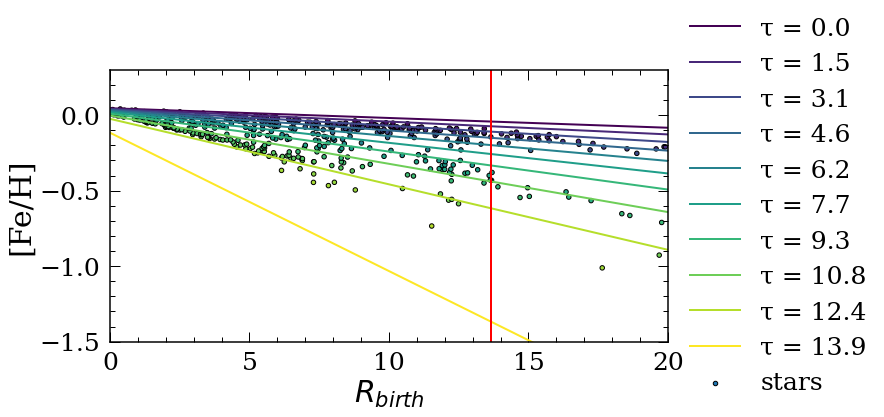

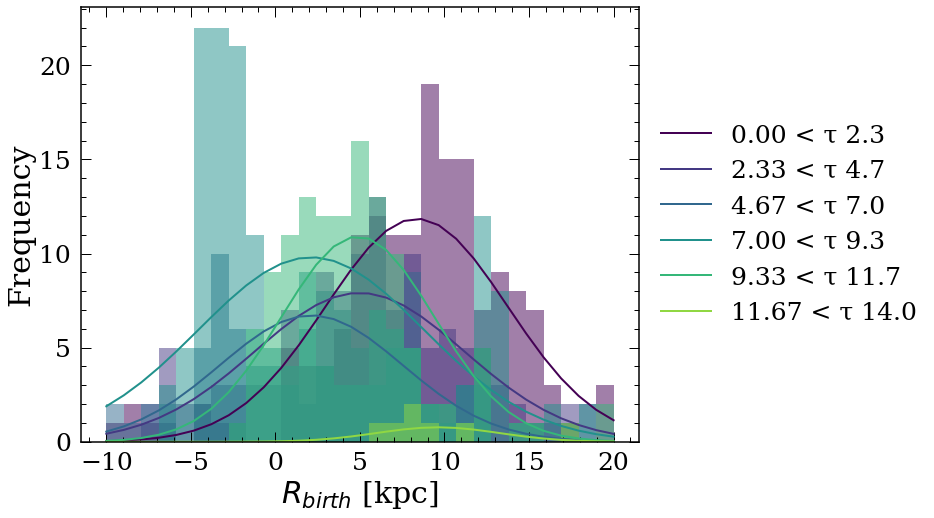

In [505]:
def getcolor(vrange,cm=plt.cm.get_cmap('viridis')):
    cmap = cm
    norm = matplotlib.colors.Normalize(vmin=min(vrange), vmax=max(vrange))
    return [cmap(norm(i)) for i in vrange]

binnumb=10
colors_feh = getcolor(np.linspace(0,13.9,binnumb))

    
# put stars back into their birth raii
ages_sr = data['age'].values[m_sr]
rbirth_inf = np.zeros(len(ages_sr))

for i in range(len(ages_sr)):
    # get relation
    m, b = feh_lookback(ages_sr[i])
    rbirth_inf[i] = (feh_sr[i]-b)/m

SolarRad=8.2*(5./3.)
# see what the results are
plt.figure(figsize=(10,5))
for count, i in enumerate(np.linspace(0,13.9,binnumb)):
    m, b = feh_lookback(i)
    plt.plot(np.linspace(0,20,10),m*(np.linspace(0,14,10))+b,label='τ = %.1f'%i,c = colors_feh[count])
plt.plot([SolarRad, SolarRad],[-1.5, 0.3], 'r-')
plt.xlabel('$R_{birth}$')
plt.ylabel('[Fe/H]')
plt.xlim([0,20])
plt.ylim([-1.5,0.3])

plt.scatter(rbirth_inf, feh_sr, s=20, c=ages_sr, edgecolors='k', label='stars',vmin=0, vmax=13.9)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    

import seaborn as sns
# historgram of mono-age population
plt.figure(figsize=(10,8))
agebin=np.linspace(0,14,7)
colors_feh = getcolor(agebin)

for i in range(len(agebin)-1):
    
    m=(ages_sr>=agebin[i])&(ages_sr<=agebin[i+1])
    """
    sns.kdeplot(rbirth_inf[m], color=colors_feh[i],
                 label='%.2f < τ %.1f'%(agebin[i], agebin[i+1]),
                 alpha=0.5,fill=True)
    
    """
    plt.hist(rbirth_inf[m], color=colors_feh[i], bins=np.linspace(-10,20,30), alpha=0.5)
    
    gausd=sum(m)/(np.std(rbirth_inf[m]) * np.sqrt(2 * np.pi)) * np.exp( - (np.linspace(-10,20,30) - np.mean(rbirth_inf[m]))**2 / (2 * np.std(rbirth_inf[m])**2))
    plt.plot(np.linspace(-10,20,30), gausd, color=colors_feh[i], label='%.2f < τ %.1f'%(agebin[i], agebin[i+1]))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('$R_{birth}$ [kpc]')
plt.ylabel('Frequency')

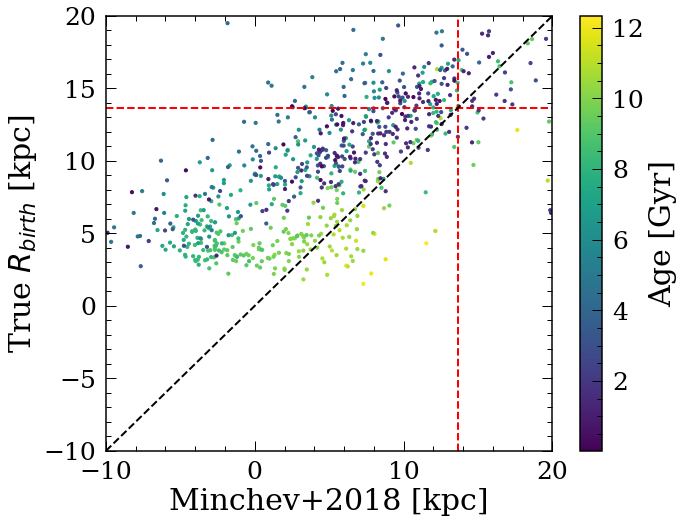

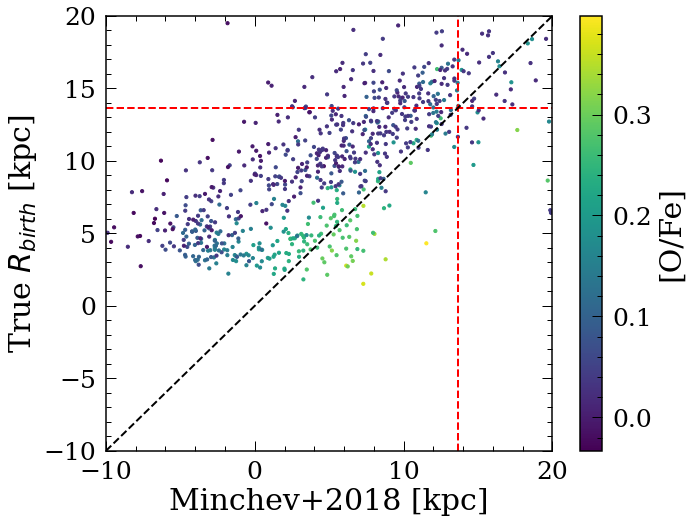

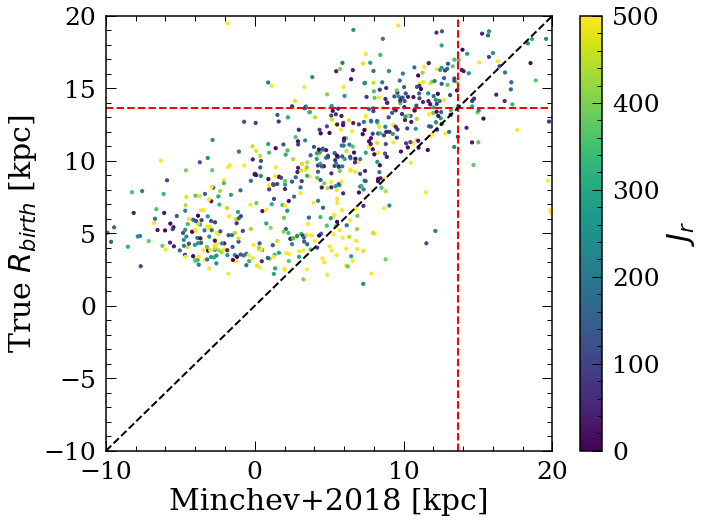

In [513]:
r_birth_true = data['R_bir'].values[m_sr]
# compare with true R_birth
plt.figure(figsize=(10,8))
plt.scatter(rbirth_inf, r_birth_true, s=10, c = ages_sr)
plt.plot([SolarRad,SolarRad],[-10,20],'r--')
plt.plot([-10,20],[SolarRad,SolarRad],'r--')
plt.plot([-10,20],[-10,20],'k--')
plt.xlim([-10,20])
plt.ylim([-10,20])
plt.xlabel('Minchev+2018 [kpc]')
plt.ylabel('True $R_{birth}$ [kpc]')
cbar = plt.colorbar()
cbar.set_label('Age [Gyr]',labelpad = 5)

# compare with true R_birth
plt.figure(figsize=(10,8))
plt.scatter(rbirth_inf, r_birth_true, s=10, c = data['ofe_scale'][m_sr])
plt.plot([SolarRad,SolarRad],[-10,20],'r--')
plt.plot([-10,20],[SolarRad,SolarRad],'r--')
plt.plot([-10,20],[-10,20],'k--')
plt.xlim([-10,20])
plt.ylim([-10,20])
plt.xlabel('Minchev+2018 [kpc]')
plt.ylabel('True $R_{birth}$ [kpc]')
cbar = plt.colorbar()
cbar.set_label('[O/Fe]',labelpad = 5)


# compare with true R_birth
plt.figure(figsize=(10,8))
plt.scatter(rbirth_inf, r_birth_true, s=10, c = data['Jr'][m_sr],vmin=0,vmax=500)
plt.plot([SolarRad,SolarRad],[-10,20],'r--')
plt.plot([-10,20],[SolarRad,SolarRad],'r--')
plt.plot([-10,20],[-10,20],'k--')
plt.xlim([-10,20])
plt.ylim([-10,20])
plt.xlabel('Minchev+2018 [kpc]')
plt.ylabel('True $R_{birth}$ [kpc]')
cbar = plt.colorbar()
cbar.set_label('$J_r$',labelpad = 5)

## Run for multiple times

In [ ]:
all_rbir_inf=[]
all_rbir=[]
all_ofe=[]
all_age=[]
all_feh=[]

all_x=[]
all_y=[]
all_z=[]

for i in trange(100):
    # present day metallicity gradient
    p=calc_dfedr_SR(data['feh_scale'].values,data['R'].values)

    # present day metallicity in the solar neighborhood
    feh_sr, r_sr, m_sr = get_SR(data['feh_scale'].values, data['x'].values, data['y'].values)

    feh_p = np.mean(feh_sr)
    
    # put stars back into their birth raii
    ages_sr = data['age'].values[m_sr]
    
    rbirth_inf = np.zeros(len(ages_sr))

    for i in range(len(ages_sr)):
        # get relation
        m, b = feh_lookback(ages_sr[i])
        rbirth_inf[i] = (feh_sr[i]-b)/m

    all_age=np.append(all_age,ages_sr)
    all_rbir=np.append(all_rbir,data['R_bir'].values[m_sr])
    all_rbir_inf=np.append(all_rbir_inf,rbirth_inf)
    all_ofe=np.append(all_ofe,data['ofe_scale'].values[m_sr])
    all_x=np.append(all_x,data['x_today'].values[m_sr])
    all_y=np.append(all_y,data['y_today'].values[m_sr])
    all_z=np.append(all_z,data['z_today'].values[m_sr])
    all_feh=np.append(all_feh,data['feh_scale'].values[m_sr])

 39%|███▉      | 39/100 [02:04<03:13,  3.17s/it]

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(data['x_today'],data['y_today'],s=1,c='k')
plt.scatter(all_x,all_y,s=10,c=all_feh)
plt.xlabel('x')
plt.ylabel('y')
cbar = plt.colorbar()
cbar.set_label('[Fe/H]',labelpad = 5)



In [ ]:
# compare with true R_birth
plt.figure(figsize=(10,8))
plt.scatter(all_rbir_inf, all_rbir, s=1, c = all_age)
plt.plot([SolarRad,SolarRad],[-10,20],'r--')
plt.plot([-10,20],[SolarRad,SolarRad],'r--')
plt.plot([-10,20],[-10,20],'k--')
plt.xlim([-10,20])
plt.ylim([-10,20])
plt.xlabel('Minchev+2018 [kpc]')
plt.ylabel('True $R_{birth}$ [kpc]')
cbar = plt.colorbar()
cbar.set_label('Age [Gyr]',labelpad = 5)

# compare with true R_birth
plt.figure(figsize=(10,8))
plt.scatter(all_rbir_inf, all_rbir, s=1, c = all_ofe)
plt.plot([SolarRad,SolarRad],[-10,20],'r--')
plt.plot([-10,20],[SolarRad,SolarRad],'r--')
plt.plot([-10,20],[-10,20],'k--')
plt.xlim([-10,20])
plt.ylim([-10,20])
plt.xlabel('Minchev+2018 [kpc]')
plt.ylabel('True $R_{birth}$ [kpc]')
cbar = plt.colorbar()
cbar.set_label('[O/Fe]',labelpad = 5)




In [ ]:
agebin=np.linspace(0,14,14)
# compare with true R_birth
for i in range(len(agebin)-1):
    plt.figure(figsize=(10,8))
    m=(all_age>agebin[i])&(all_age<agebin[i+1])
    plt.scatter(all_rbir_inf[m], all_rbir[m], s=1, c = all_ofe[m], vmin=0, vmax=0.4)
    plt.plot([SolarRad,SolarRad],[-10,20],'r--')
    plt.plot([-10,20],[SolarRad,SolarRad],'r--')
    plt.plot([-10,20],[-10,20],'k--')
    plt.xlim([-10,20])
    plt.ylim([-10,20])
    plt.xlabel('Minchev+2018 [kpc]')
    plt.ylabel('True $R_{birth}$ [kpc]')
    plt.title('%d < τ < %d'%(agebin[i],agebin[i+1]),fontsize=25)
    cbar = plt.colorbar()
    cbar.set_label('[O/Fe]',labelpad = 5)





In [ ]:
# compare with true R_birth
ofebin=np.linspace(0,0.4,14)
for i in range(len(ofebin)-1):
    m=(all_ofe>ofebin[i])&(all_ofe<ofebin[i+1])
    plt.figure(figsize=(10,8))
    plt.scatter(all_rbir_inf[m], all_rbir[m], s=1, c = all_age[m],vmin=0,vmax=14)
    plt.plot([SolarRad,SolarRad],[-10,20],'r--')
    plt.plot([-10,20],[SolarRad,SolarRad],'r--')
    plt.plot([-10,20],[-10,20],'k--')
    plt.title('%.2f < [O/Fe] < %.2f'%(ofebin[i],ofebin[i+1]),fontsize=25)
    plt.xlim([-10,20])
    plt.ylim([-10,20])
    plt.xlabel('Minchev+2018 [kpc]')
    plt.ylabel('True $R_{birth}$ [kpc]')
    cbar = plt.colorbar()
    cbar.set_label('Age [Gyr]',labelpad = 5)

## plot in chemical plane

In [ ]:
from scipy.ndimage import gaussian_filter
import math
from matplotlib import rc
rc('text', usetex=False) 
Febin=np.linspace(-0.8,0.5,10)
alpha=np.linspace(0.3,-0.05,10)

#plt.figure(figsize=(len(Febin)*10-10,len(alpha)*10-10))

x1,x2,y1,y2 = 2.5,17.5,-4,4
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40



fig, axarr = plt.subplots(len(alpha)-1,len(Febin)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(len(Febin)*5,len(alpha)*5-5))
count=0


for i in range(len(alpha)-1):
    print(i/(len(alpha)-1))
    clear_output(wait = True)
    
    df_all=(all_ofe>alpha[i+1])
    df_all=df_all&(all_ofe<alpha[i])
    #print(len(df_all))
    
    for j in trange(len(Febin)-1):
        df_all_z=df_all&(all_feh>Febin[j])
        df_all_z=df_all_z&(all_feh<Febin[j+1])
        
        
        
        im=axarr[i,j].scatter(all_rbir_inf[df_all_z], all_rbir[df_all_z], s=1, c = all_age[df_all_z],vmin=0,vmax=14)
        axarr[i,j].plot([SolarRad,SolarRad],[-10,20],'r--')
        axarr[i,j].plot([-10,20],[SolarRad,SolarRad],'r--')
        axarr[i,j].plot([-10,20],[-10,20],'k--')
        axarr[i,j].set_xlim([-10,20])
        axarr[i,j].set_ylim([-10,20])
        
        cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
        cmap1.set_bad('white',1.)
    
        count=count+1
        if j!=0:
            axarr[i,j].set_yticklabels([])
        else:
            axarr[i,j].set_ylabel('Minchev+2018 [kpc]',fontsize=50) 
        if i!=len(alpha)-2:
            axarr[i,j].set_xticklabels([])
        else:
            axarr[i,j].set_xlabel('True $R_{birth}$ [kpc]',fontsize=50) 

        axarr[i,j].tick_params(which='major',labelsize=50,direction='in',top=True,right=True,length=20)
        axarr[i,j].tick_params(which='minor', length=10, direction='in',top=True,right=True)

        
cb_ax = fig.add_axes([0.109, 0.915, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
cbar.ax.tick_params(labelsize=50) 
car = cbar.set_label('Age [Gyr]',fontsize = 50,labelpad = 5)


fig.text(0.02, 0.5, 'mean [O/Fe]', ha='center', va='center', rotation='vertical',fontsize=100)
fig.text(0.5, 0.05, 'mean [Fe/H]', ha='center', va='center', rotation='horizontal',fontsize=100)

    
for i in range(0,10-1):
    fig.text(0.03, 0.16+0.085*i, '%.2f'%((0.3-alpha[i]-0.05+0.3-alpha[i+1]-0.05)/2.), rotation='horizontal',
             fontsize=70)
    fig.text(0.13+0.0875*i, 0.07, '%.2f'%((Febin[i]+Febin[i+1])/2.), rotation='horizontal',
             fontsize=70)



